                            ** Indegence Data Science Assignment **

                                  Text Classification Analysis 

                                  Submitted By : Siddhesh Dosi

In [49]:
# import all required packages
import pandas as pd
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from string import punctuation
%matplotlib inline

In [50]:
# Read the input file
data = pd.read_csv("../data/Data.csv")

#### Count observation for each ADR labels

In [51]:
data.ADR_label.value_counts()

0    16694
1     6822
Name: ADR_label, dtype: int64

### Create word cloud for ADR label = 1

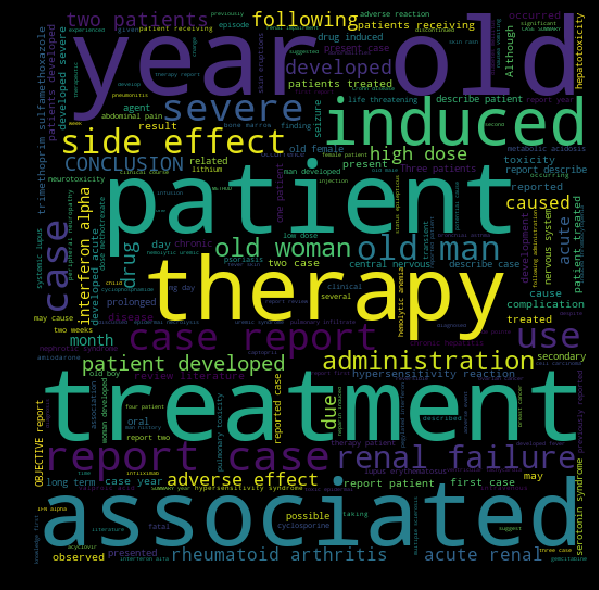

In [52]:
data_ADR_1_word = ' '.join(list(data[data['ADR_label'] == 1]['Tweet']))
spam_wc = WordCloud(width = 512,height = 512).generate(data_ADR_1_word)
plt.figure(figsize = (8, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### Create word cloud for ADR label = 0

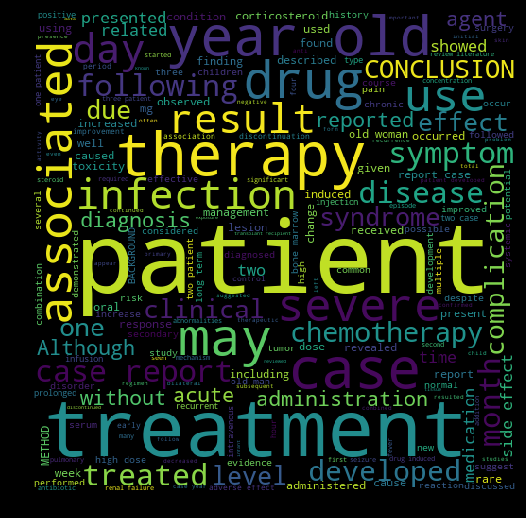

In [53]:
data_ADR_1_word = ' '.join(list(data[data['ADR_label'] == 0]['Tweet']))
spam_wc = WordCloud(width = 512,height = 512).generate(data_ADR_1_word)
plt.figure(figsize = (7, 7), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Find top frequenct terms to create custom stop word list
    * This will help to remove noise word which will harm for the classification.
    * Create custom stop word list with help of top frequent word.

In [43]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize


custom_words=['\'s','also','',"''",'``','le','.The','--']
stop_words = set(stopwords.words('english') + list(punctuation) + custom_words)
wordnet_lemmatizer = WordNetLemmatizer()

class_corpus = data.groupby('ADR_label').apply(lambda x: x['Tweet'].str.cat())
class_corpus

class_corpus = class_corpus.apply(lambda x: Counter(
    [wordnet_lemmatizer.lemmatize(w) 
     for w in word_tokenize(x) 
     if w.lower() not in stop_words and not w.isdigit()]
))
whole_text_freq = class_corpus.sum()


label, repetition = zip(*whole_text_freq.most_common(1000))
print(label)

('patient', 'case', 'treatment', 'report', 'therapy', 'developed', 'may', 'associated', 'treated', 'acute', 'drug', 'severe', 'syndrome', 'effect', 'renal', 'following', 'disease', 'use', 'two', 'day', 'clinical', 'symptom', 'reported', 'month', 'reaction', 'woman', 'complication', 'administration', 'infection', 'cause', 'first', 'due', 'year', 'chronic', 'liver', 'chemotherapy', 'receiving', 'one', 'cell', 'level', 'used', 'describe', 'week', 'present', 'adverse', 'pulmonary', 'man', 'dose', 'presented', 'study', 'induced', 'showed', 'toxicity', 'failure', 'agent', 'diagnosis', 'without', 'three', 'child', 'blood', 'hepatitis', 'rare', 'serum', 'received', 'well', 'course', 'risk', 'pain', 'side', 'oral', 'including', 'fever', 'high', 'systemic', 'caused', 'disorder', 'skin', 'review', 'intravenous', 'factor', 'combination', 'mg', 'within', 'increased', 'history', 'result', 'literature', 'revealed', 'potential', 'finding', 'cancer', 'normal', 'related', 'secondary', 'possible', 'multi

## Text Transforamtion into vector form
    * Convert text into vectorized form using tfidf.
    * Tfidf uses to define term weight in corpus.
    * Remove all english words, punctuation and custom stop words before applying Tf-idf.
    * Using Bigram to create document term matric.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

custom_words=['\'s','also','',"''",'``','le','.The','--']
stop_words = set(stopwords.words('english') + list(punctuation) + custom_words)

vectorizer = TfidfVectorizer(lowercase=True,stop_words=stop_words,analyzer = "word",ngram_range=(1,2))
X = vectorizer.fit_transform(data['Tweet'])

## Find top weighted terms after tfidf
    * Manually check top weighted bigram terms that it's useful for the classification or not.
    * If bigram terms are impacting to give worng classification prediction then remove the terms from corpus.

In [45]:
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 50
top_features = [features[i] for i in indices[:top_n]]
print (top_features)

['justice greater', 'iliocaval', 'ileus caused', 'ileus common', 'ileus due', 'ileus neostigmine', 'ileus peripheral', 'ileus resulting', 'ileus spontaneously', 'ileus triggered', 'iliac arteries', 'anthracostenosis describes', 'iliac dissection', 'iliac dissections', 'iliac vein', 'iliocaval manifestations', 'il opium', 'ill adolescent', 'ill adults', 'ill defined', 'ill developing', 'ill effect', 'ill inadvertently', 'ill looking', 'ill neonates', 'anthony fire', 'anthony', 'ill persons', 'ill schizophrenic', 'ill young', 'ileus bortezomib', 'ileus administration', 'ileum urinary', 'ileum together', 'il production', 'il safe', 'il serum', 'il sole', 'il4', 'il4 cd4', 'anthracyclines rituximab', 'ild diagnosed', 'ild patient', 'ild patients', 'ild sufficient', 'ilds', 'ilds idiopathic', 'ile', 'ile reduced', 'anthracyclines methotrexate']


## Split the data into taining and test
    * Taking 30% test data from input data

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,data["ADR_label"], test_size = 0.3, random_state = 10)


## Apply all classification algorithm
    * Check which classification is giving better result among all classification algorithm

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


#svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
svc = SVC(kernel='rbf', gamma=0.1,C=10,probability=True)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}


def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
    
    
def predict_labels(clf, features):
    return (clf.predict(features))

def score(y_test,pred,average):
    f_score = f1_score(y_test,pred,average=average)
    precision=precision_score(y_test,pred,average=average)
    recall = recall_score(y_test,pred,average=average)
    return precision,recall,f_score

pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train)
    pred = predict_labels(v,X_test)
    precision,recall,fscore =score(y_test,pred,average ='binary')
    res = {'Model':k,'Score':accuracy_score(y_test,pred),'Precision':precision,'Recall':recall,'F_Score':fscore}
    #pred_scores.append((k, [accuracy_score(y_test,pred)],[precision],[recall],[fscore]))
    pred_scores.append(res)
    
#df3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score','Precision,Recall,F_Score'])
df3 = pd.DataFrame(pred_scores)

####  Below result comes after using 'unigram' in Tf-idf

In [13]:
df

,Score
SVC,0.866194
KN,0.794189
NB,0.858682
DT,0.833735
LR,0.853154
RF,0.880227
AdaBoost,0.802126
BgC,0.854713
ETC,0.872147


#### Below result comes after using 'Bigram' in Tf-idf

In [10]:
df1

,Score
SVC,0.892700
KN,0.790078
NB,0.880085
DT,0.836003
LR,0.838129
RF,0.873423
AdaBoost,0.810064
BgC,0.854429
ETC,0.871155


####  Below result comes after using 'Trigram' in tf-idf

In [14]:
df2

,Score
SVC,0.890007
KN,0.787243
NB,0.882353
DT,0.843515
LR,0.827498
RF,0.871580
AdaBoost,0.806378
BgC,0.857973
ETC,0.864777


#### Below result comes after using 'Bigram' with remove noise data from input file in Tf-idf

In [23]:
df3

,Score
SVC,0.895252
KN,0.790787
NB,0.884763
DT,0.845216
LR,0.840964
RF,0.869880
AdaBoost,0.813466
BgC,0.857548
ETC,0.868037


#### Check above result with adding more stop words and calculate precision, recall and F-score

In [80]:
df3.set_index('Model', inplace=True)
df3

,F_Score,Precision,Recall,Score
Model,,,,
SVC,0.823870,0.897480,0.761419,0.905032
KN,0.547193,0.749155,0.431001,0.791921
NB,0.796606,0.818881,0.775510,0.884479
DT,0.729009,0.734583,0.723518,0.843090
LR,0.684107,0.812291,0.590865,0.840822
RF,0.732335,0.953978,0.594266,0.873281
AdaBoost,0.605886,0.745739,0.510204,0.806378
BgC,0.748796,0.782724,0.717687,0.859532
ETC,0.738302,0.910256,0.620991,0.871580


#### Calculate the confusion matric for random forest model

In [14]:
from sklearn.metrics import confusion_matrix
train_classifier(rfc, X_train, y_train)
pred = predict_labels(rfc,X_test)
confu_mat = confusion_matrix(y_test,pred)

In [15]:
confu_mat

array([[4864,  133],
       [ 712, 1346]])

#### SVM is giving better result than other model so caculate the confusion matrix for that.

In [79]:
from sklearn.metrics import confusion_matrix
svc = SVC(kernel='rbf', gamma=0.1,C=10,probability=True)
train_classifier(svc, X_train, y_train)
pred = predict_labels(svc,X_test)
precision,recall,fscore =score(y_test,pred,average ='binary')
accuracy_score(y_test,pred)
confu_mat = confusion_matrix(y_test,pred)
print(accuracy_score(y_test,pred))
print(precision,recall,fscore)
print(confu_mat)

0.9050318922749823
0.8974799541809851 0.761418853255588 0.8238696109358571
[[4818  179]
 [ 491 1567]]


#### Looks like support vector machine and Naive bayes model is working better than other classification model
#### Now do fine tuning parameter for SVM model :
* Grid search will be used to fine tune parameter.
* Using cross validation on that so that overfitting won't happened.

In [81]:
# SVM Parameter Tuning 

from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds=5):
    Cs = [0.001,0.01, 0.1, 1, 10]
    #Cs = [10]
    gammas = [0.001, 0.01, 0.1, 1]
    #gammas = [0.01]
    kernel = ['rbf','sigmoid','linear']
    param_grid = {'C': Cs, 'gamma' : gammas,'kernel':kernel}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    #grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svm_best_prama = svc_param_selection(X_test,y_test)

In [82]:
svm_best_prama

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

#### Now create AUC curve for the model SVM  to check how much the model is fit with the data set.

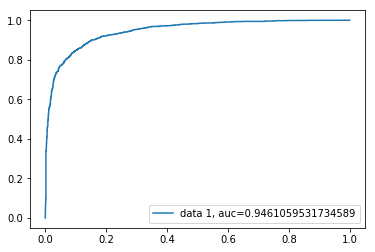

In [59]:
# Looks like support vector machine model is working better than other classification model

from sklearn.metrics import confusion_matrix
from sklearn import metrics

train_classifier(svc, X_train, y_train)
#pred = predict_labels(svc,X_test)

y_pred_proba = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

* Above AUC result is giving the 94.61%. It means model is fitted very good for the input data set.

## Conclusion:

* From all classification machine Learning model SVM and Naive Bayes model are good fit with the given data set.
* Support vector machine model is fitting best model on the input data set after calculating F1 score and AUC.
* We can even increase more accuracy after fine tuning parameters and cross validation.
* I have used Tf-idf to define the weight of every term in the tweet.
* Neural Net model can also be created for predicting ADR labels using LSTM.